# Task 2: Lookalike Model 

## Build a Lookalike Model that takes a user's information as input and recommends 3 similar 
## customers based on their profile and transaction history. The model should: 
### ● Use both customer and product information. 
### ● Assign a similarity score to each recommended customer. 

## Deliverables: 
### ● Give the top 3 lookalikes with there similarity scores for the first 20 customers 
#### (CustomerID: C0001 - C0020)  in Customers.csv. Form an “Lookalike.csv” which has 
#### just one map: Map<cust_id, List<cust_id, score>>   

## Evaluation Criteria: 
### ● Model accuracy and logic. 
### ● Quality of recommendations and similarity scores.

# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import datetime 
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
ls

 Volume in drive C is OS
 Volume Serial Number is B09C-EF2A

 Directory of C:\Users\HP\OneDrive\Documents\Python_Program\Data Science Assignment eCommerce

28-01-2025  00:04    <DIR>          .
25-01-2025  11:55    <DIR>          ..
26-01-2025  21:53    <DIR>          .ipynb_checkpoints
26-01-2025  21:46    <DIR>          Datasets
26-01-2025  19:17             1,961 Lookalike.csv
27-01-2025  09:19         1,072,761 Task1_EDA.ipynb
28-01-2025  00:04            38,723 Task2_lookalikeModel.ipynb
27-01-2025  23:58           461,731 Task3_Customer_Clustering.ipynb
27-01-2025  08:42           105,424 transaction_data.csv
               5 File(s)      1,680,600 bytes
               4 Dir(s)  46,255,071,232 bytes free


# Loading Datasets

In [4]:
customer_df= pd.read_csv('Datasets/Customers.csv')
customer_df.sample(5)

,CustomerID,CustomerName,Region,SignupDate
58,C0059,Mrs. Kimberly Wright,North America,2024-04-07
130,C0131,Scott Wilson,North America,2022-06-05
114,C0115,Joshua Hamilton,Asia,2024-11-11
115,C0116,James Martinez,North America,2024-09-11
175,C0176,Nicole Booth,North America,2022-03-23


In [5]:
product_df=pd.read_csv('Datasets/Products.csv')
product_df.sample(5)

,ProductID,ProductName,Category,Price
71,P072,ActiveWear Headphones,Electronics,399.34
15,P016,ActiveWear Running Shoes,Clothing,330.05
23,P024,SoundWave Cookbook,Books,338.66
51,P052,SoundWave Jacket,Clothing,354.81
26,P027,SoundWave Headphones,Electronics,229.06


In [6]:
transaction_df=pd.read_csv('Datasets/Transactions.csv')
transaction_df.sample(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
569,T00971,C0023,P017,2024-06-22 21:26:26,1,469.77,469.77
70,T00602,C0024,P053,2024-04-26 11:26:53,1,274.94,274.94
644,T00088,C0019,P001,2024-01-30 17:23:03,2,338.60,169.30
334,T00124,C0076,P058,2024-02-07 01:32:26,3,472.86,157.62
893,T00520,C0052,P028,2024-04-20 08:12:59,1,235.58,235.58


# EDA

In [7]:
data = transaction_df.merge(customer_df, on="CustomerID").merge(product_df, on="ProductID")

In [8]:
data.sample(5)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
72,T00609,C0094,P066,2024-03-19 01:04:53,1,337.22,337.22,Emily Trevino,North America,2023-09-16,SoundWave Textbook,Books,337.22
117,T00985,C0068,P088,2024-07-30 21:37:27,2,527.10,263.55,Mark Cox,North America,2023-04-04,SoundWave Headphones,Electronics,263.55
108,T00319,C0139,P032,2024-01-17 09:48:56,1,488.63,488.63,Ricky Gutierrez,North America,2022-03-14,BookWorld Cookbook,Books,488.63
311,T00101,C0008,P052,2024-09-16 22:10:13,4,1419.24,354.81,David Li,North America,2024-01-13,SoundWave Jacket,Clothing,354.81
29,T00656,C0065,P079,2024-09-13 08:28:58,1,417.37,417.37,Gerald Hines,North America,2024-07-10,ActiveWear Rug,Home Decor,417.37


In [9]:
data.drop(columns=['Price_y'])

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics
...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00630,C0031,P093,2024-10-08 23:58:14,2,609.88,304.94,Tina Miller,South America,2024-04-11,TechPro Vase,Home Decor
996,T00672,C0165,P044,2024-07-28 00:09:49,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing
997,T00711,C0165,P044,2024-06-11 15:51:14,4,75.28,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing
998,T00878,C0165,P044,2024-09-24 21:15:21,3,56.46,18.82,Juan Mcdaniel,South America,2022-04-09,ActiveWear Running Shoes,Clothing


In [10]:
data = data.rename(columns={"Price_x": "Price"})

In [11]:
customer_profiles = data.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "Quantity": "sum",
    "Price": "mean",
    "Category": lambda x: x.mode()[0],  # Most common category
    "Region": lambda x: x.mode()[0],   # Most common region
}).reset_index()

# Encoding categorical features

In [12]:
# Encode categorical features
encoder = LabelEncoder()
customer_profiles["Category"] = encoder.fit_transform(customer_profiles["Category"])
customer_profiles["Region"] = encoder.fit_transform(customer_profiles["Region"])

# Scaling 

In [13]:
# Normalize numerical features
scaler = MinMaxScaler()
numerical_features = ["TotalValue", "Quantity", "Price"]
customer_profiles[numerical_features] = scaler.fit_transform(customer_profiles[numerical_features])

In [14]:
# Calculate similarity matrix
customer_features = customer_profiles.drop("CustomerID", axis=1)
similarity_matrix = cosine_similarity(customer_features)

# Recommendation System

In [15]:
# Find top 3 lookalikes for the first 20 customers
lookalikes = []
for idx, customer_id in enumerate(customer_profiles["CustomerID"][:20]):
    # Get similarity scores for this customer
    scores = similarity_matrix[idx]
    top_lookalikes = sorted(
        [(customer_profiles["CustomerID"][i], scores[i]) for i in range(len(scores)) if i != idx],
        key=lambda x: x[1],
        reverse=True,
    )[:3]
     # Add to results
    for lookalike_id, score in top_lookalikes:
        lookalikes.append([customer_id, lookalike_id, score])

In [16]:
# Save results to Lookalike.csv
lookalike_df = pd.DataFrame(lookalikes, columns=["CustomerID", "LookalikeCustomerID", "SimilarityScore"])
lookalike_df.to_csv("Lookalike.csv", index=False)

print("Lookalike recommendations saved to Lookalike.csv!")

Lookalike recommendations saved to Lookalike.csv!


In [17]:
lookalike_df.head(20)

,CustomerID,LookalikeCustomerID,SimilarityScore
0,C0001,C0181,0.999625
1,C0001,C0184,0.999345
2,C0001,C0120,0.999326
3,C0002,C0088,0.998965
4,C0002,C0106,0.992824
5,C0002,C0162,0.991723
6,C0003,C0031,0.999223
7,C0003,C0157,0.999209
8,C0003,C0052,0.999194
9,C0004,C0169,0.998787


# Validating The look- A like Model Performance

In [19]:
# Validate a few customers manually
customer_id_to_validate = "C0001" 
lookalikes_to_validate = lookalike_df[lookalike_df["CustomerID"] == customer_id_to_validate]


In [20]:
# Check details of the customer and their lookalikes
original_customer_profile = customer_profiles[customer_profiles["CustomerID"] == customer_id_to_validate]
lookalike_profiles = customer_profiles[customer_profiles["CustomerID"].isin(lookalikes_to_validate["LookalikeCustomerID"])]

In [21]:
print("Original Customer Profile:\n", original_customer_profile)
print("\nLookalike Customer Profiles:\n", lookalike_profiles)

Original Customer Profile:
   CustomerID  TotalValue  Quantity     Price  Category  Region
0      C0001    0.308942  0.354839  0.519414         2       3

Lookalike Customer Profiles:
     CustomerID  TotalValue  Quantity     Price  Category  Region
119      C0120    0.225432  0.258065  0.562669         2       3
179      C0181    0.308288  0.451613  0.490783         2       3
182      C0184    0.312592  0.322581  0.649960         2       3


# Model Performance ' Similarity Scores'

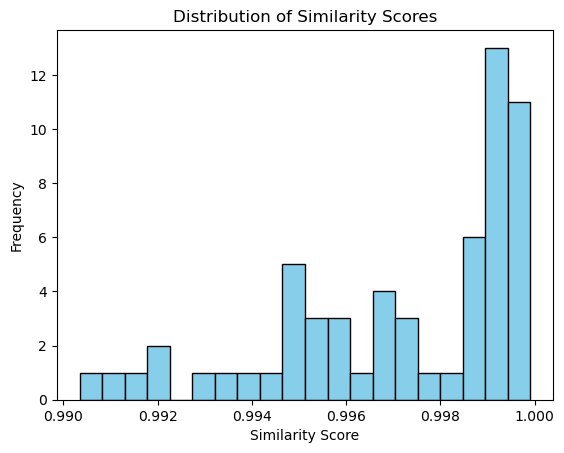

In [22]:
lookalike_scores = lookalike_df["SimilarityScore"]
plt.hist(lookalike_scores, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Similarity Scores")
plt.xlabel("Similarity Score")
plt.ylabel("Frequency")
plt.show()

# CONCLUSION

## Here the similarity scores of the lookalike Model is from 99% and above